# Introduction 
the dataset from kaggle from this link https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset

# Question 




1. What are the top 10 movies with the highest IMDb ratings?
2. Which movies were directed by Ridley Scott?
3. Which genres are most common among the movies listed?
4. How many movies have a Motion Picture Rating of "R"?
5. What is the average runtime of movies released after 2020?
6. Which movies have grossed over $100 million worldwide?
7. Who are the top 5 most frequent directors in this dataset?
8. What is the average number of ratings per movie?
9. Which movies have a runtime longer than 4 hours?
10. What is the highest-grossing movie in the US & Canada?
11. Which PG-13 rated movies have the highest IMDb ratings?
12. What are the most common release years in the dataset?
13. Which writers have written more than 6 movies here?
14. How many movies are categorized as "Horror"?
15. What is the correlation between rating scores and number of ratings?
16. Which movies had a higher opening weekend gross than total US gross (indicating quick drop-offs)?



# Import Library


In [1]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns 
import matplotlib.pyplot as plt


# Load the Data


In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\DATASET.csv")
df

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend Gross in US & Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004"
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 9083 non-null   object 
 1   Summary                               9083 non-null   object 
 2   Director                              9052 non-null   object 
 3   Writer                                8759 non-null   object 
 4   Main Genres                           9076 non-null   object 
 5   Motion Picture Rating                 8285 non-null   object 
 6   Runtime                               8918 non-null   object 
 7   Release Year                          9076 non-null   float64
 8   Rating                                8813 non-null   object 
 9   Number of Ratings                     8813 non-null   object 
 10  Budget                                5879 non-null   object 
 11  Gross in US & Can

# Data Cleaning

#### fix Columns' Headers

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_')         # replaces spaces with underscore

In [5]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004"
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()           #shows num of missing values for each column


Title                                      0
Summary                                    0
Director                                  31
Writer                                   324
Main_Genres                                7
Motion_Picture_Rating                    798
Runtime                                  165
Release_Year                               7
Rating                                   270
Number_of_Ratings                        270
Budget                                  3204
Gross_in_US_&_Canada                    3019
Gross_worldwide                         1955
Opening_Weekend_Gross_in_US_&_Canada    3388
dtype: int64

In [7]:
df = df.dropna(subset=['Title', 'Release_Year'])        # drop row if there is no title and release year ( critical info )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 9082
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 9076 non-null   object 
 1   Summary                               9076 non-null   object 
 2   Director                              9046 non-null   object 
 3   Writer                                8752 non-null   object 
 4   Main_Genres                           9069 non-null   object 
 5   Motion_Picture_Rating                 8278 non-null   object 
 6   Runtime                               8917 non-null   object 
 7   Release_Year                          9076 non-null   float64
 8   Rating                                8813 non-null   object 
 9   Number_of_Ratings                     8813 non-null   object 
 10  Budget                                5878 non-null   object 
 11  Gross_in_US_&_Canada  

In [9]:
#FIX DATA TYPES

In [10]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004"
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

df.loc[:, 'Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce').astype('Int64')

#changing the "release year" to int instead of float"

In [12]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004"
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import pandas as pd
import re

def runtime_to_minutes(runtime):
    if pd.isna(runtime):
        return None
    match = re.match(r'^(?:(\d+)h\s*)?(?:(\d+)m)?$', str(runtime).strip())
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None
df = df.copy() 
df['Runtime_Minutes'] = df['Runtime'].apply(runtime_to_minutes).astype('Int64')


In [14]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada,Runtime_Minutes
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023",158
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023",157
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN,118
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN,102
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023",106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN,95
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004",98
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,152
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,152


In [15]:
def fix_rating(a):
    try:
        if a.endswith('/10'):
            return float(a[:-3])
        else:
            return 0.0
    except:
            return np.nan
df['Rating']=df['Rating'].apply(fix_rating)

In [16]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada,Runtime_Minutes
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023",158
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023",157
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8,117K,NaN,NaN,"$421,332",NaN,118
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0,10K,NaN,NaN,NaN,NaN,102
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023",106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3,24K,NaN,NaN,NaN,NaN,95
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004",98
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,152
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,152


In [17]:
def clean_number_of_ratings(x):
    if pd.isna(x):
        return None
    x = x.strip()
    try:
        if 'M' in x:
            x = x.replace('M', '')
            return int(float(x) * 1000000)
        elif 'K' in x:
            x = x.replace('K', '')
            return int(float(x) * 1000)
        else:
            return int(float(x))
    except ValueError:
        return None

df.loc[:, 'Number_of_Ratings_Num'] = df['Number_of_Ratings'].apply(clean_number_of_ratings).astype('Int64')


In [18]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada,Runtime_Minutes,Number_of_Ratings_Num
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023",158,38000
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023",157,37000
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8,117K,NaN,NaN,"$421,332",NaN,118,117000
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0,10K,NaN,NaN,NaN,NaN,102,10000
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023",106,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3,24K,NaN,NaN,NaN,NaN,95,24000
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004",98,15000
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,152,16000
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,152,<NA>


In [19]:
def clean_money_column(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    value = re.sub(r'[\$,]', '', value)
    value = re.sub(r'\(estimated\)', '', value, flags=re.IGNORECASE)
    value = re.sub(r'\(([\d.]+)\)', r'-\1', value)  # Handle (500) → -500
    value = re.sub(r'[^\d.-]', '', value)  # Keep only digits, '.', and '-'
    try:
       return float(value) if value else None
    except ValueError:
        return None

# Check column names first
print("Columns in DataFrame:", df.columns.tolist())

# Update this list to match your actual column names
money_columns = ['Budget', 'Gross_in_US_&_Canada', 'Gross_worldwide']  # Adjusted names

# Apply cleaning
for col in money_columns:
    if col in df.columns:  # Check if column exists
        df[col + '_Num'] = df[col].apply(clean_money_column) 
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

Columns in DataFrame: ['Title', 'Summary', 'Director', 'Writer', 'Main_Genres', 'Motion_Picture_Rating', 'Runtime', 'Release_Year', 'Rating', 'Number_of_Ratings', 'Budget', 'Gross_in_US_&_Canada', 'Gross_worldwide', 'Opening_Weekend_Gross_in_US_&_Canada', 'Runtime_Minutes', 'Number_of_Ratings_Num']


In [20]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Opening_Weekend_Gross_in_US_&_Canada,Runtime_Minutes,Number_of_Ratings_Num,Budget_Num,Gross_in_US_&_Canada_Num,Gross_worldwide_Num
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023",158,38000,NaN,37514498.0,84968381.0
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023",157,37000,100000000.0,105043414.0,191729235.0
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8,117K,NaN,NaN,"$421,332",NaN,118,117000,NaN,NaN,421332.0
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0,10K,NaN,NaN,NaN,NaN,102,10000,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023",106,9100,NaN,25408677.0,29666585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3,24K,NaN,NaN,NaN,NaN,95,24000,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4,15K,"$6,400,000 (estimated)","$767,373","$2,561,820","$50,278Apr 18, 2004",98,15000,6400000.0,767373.0,2561820.0
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,152,16000,4000000.0,36000000.0,36000000.0
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,152,<NA>,NaN,NaN,NaN


In [21]:
# Make a copy of the original column to work with
df['Opening_Weekend_Gross'] = df['Opening_Weekend_Gross_in_US_&_Canada'].str.extract(r'(\$\d{1,3}(?:,\d{3})*)')
df['Opening_Weekend_Date'] = df['Opening_Weekend_Gross_in_US_&_Canada'].str.extract(r'([A-Za-z]{3} \d{1,2}, \d{4})')

# Display the updated DataFrame
df[['Opening_Weekend_Gross_in_US_&_Canada', 'Opening_Weekend_Gross', 'Opening_Weekend_Date']].head()

,Opening_Weekend_Gross_in_US_&_Canada,Opening_Weekend_Gross,Opening_Weekend_Date
0,"$20,638,887Nov 26, 2023","$20,638,887","Nov 26, 2023"
1,"$44,607,143Nov 19, 2023","$44,607,143","Nov 19, 2023"
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,"$10,306,272Nov 19, 2023","$10,306,272","Nov 19, 2023"


In [22]:
df.drop(columns=['Opening_Weekend_Gross_in_US_&_Canada'], inplace=True)

In [23]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,Budget,Gross_in_US_&_Canada,Gross_worldwide,Runtime_Minutes,Number_of_Ratings_Num,Budget_Num,Gross_in_US_&_Canada_Num,Gross_worldwide_Num,Opening_Weekend_Gross,Opening_Weekend_Date
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7,38K,NaN,"$37,514,498","$84,968,381",158,38000,NaN,37514498.0,84968381.0,"$20,638,887","Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235",157,37000,100000000.0,105043414.0,191729235.0,"$44,607,143","Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8,117K,NaN,NaN,"$421,332",118,117000,NaN,NaN,421332.0,NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0,10K,NaN,NaN,NaN,102,10000,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0,9.1K,NaN,"$25,408,677","$29,666,585",106,9100,NaN,25408677.0,29666585.0,"$10,306,272","Nov 19, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3,24K,NaN,NaN,NaN,95,24000,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4,15K,"$6,400,000 (estimated)","$767,373","$2,561,820",98,15000,6400000.0,767373.0,2561820.0,"$50,278","Apr 18, 2004"
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",152,16000,4000000.0,36000000.0,36000000.0,NaN,NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,152,<NA>,NaN,NaN,NaN,NaN,NaN


In [24]:
def fix_price(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    value = re.sub(r'[\$,]', '', value)
    value = re.sub(r'\(estimated\)', '', value, flags=re.IGNORECASE)
    value = re.sub(r'\(([\d.]+)\)', r'-\1', value)  # Handle (500) → -500
    value = re.sub(r'[^\d.-]', '', value)  # Keep only digits, '.', and '-'
    try:
       return float(value) if value else None
    except ValueError:
        return None
        
# Check column names first
print("Columns in DataFrame:", df.columns.tolist())

# Update this list to match your actual column names
money_columns = ['Budget', 'Gross_in_US_&_Canada', 'Gross_worldwide','Opening_Weekend_Gross']  # Adjusted names

# Apply cleaning
for col in money_columns:
    if col in df.columns:  # Check if column exists
        df[col + '_Num'] = df[col].apply(clean_money_column) 
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

Columns in DataFrame: ['Title', 'Summary', 'Director', 'Writer', 'Main_Genres', 'Motion_Picture_Rating', 'Runtime', 'Release_Year', 'Rating', 'Number_of_Ratings', 'Budget', 'Gross_in_US_&_Canada', 'Gross_worldwide', 'Runtime_Minutes', 'Number_of_Ratings_Num', 'Budget_Num', 'Gross_in_US_&_Canada_Num', 'Gross_worldwide_Num', 'Opening_Weekend_Gross', 'Opening_Weekend_Date']


In [25]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Runtime,Release_Year,Rating,Number_of_Ratings,...,Gross_in_US_&_Canada,Gross_worldwide,Runtime_Minutes,Number_of_Ratings_Num,Budget_Num,Gross_in_US_&_Canada_Num,Gross_worldwide_Num,Opening_Weekend_Gross,Opening_Weekend_Date,Opening_Weekend_Gross_Num
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7,38K,...,"$37,514,498","$84,968,381",158,38000,NaN,37514498.0,84968381.0,"$20,638,887","Nov 26, 2023",20638887.0
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2,37K,...,"$105,043,414","$191,729,235",157,37000,100000000.0,105043414.0,191729235.0,"$44,607,143","Nov 19, 2023",44607143.0
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8,117K,...,NaN,"$421,332",118,117000,NaN,NaN,421332.0,NaN,NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0,10K,...,NaN,NaN,102,10000,NaN,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0,9.1K,...,"$25,408,677","$29,666,585",106,9100,NaN,25408677.0,29666585.0,"$10,306,272","Nov 19, 2023",10306272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3,24K,...,NaN,NaN,95,24000,NaN,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4,15K,...,"$767,373","$2,561,820",98,15000,6400000.0,767373.0,2561820.0,"$50,278","Apr 18, 2004",50278.0
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5,16K,...,"$36,000,000","$36,000,000",152,16000,4000000.0,36000000.0,36000000.0,NaN,NaN,NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,...,NaN,NaN,152,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.drop(['Runtime'], axis=1, inplace=True, errors='ignore')
df.drop(['Number_of_Ratings'], axis=1, inplace=True, errors='ignore')
df.drop(['Budget'], axis=1, inplace=True, errors='ignore')
df.drop(['Gross_in_US_&_Canada'], axis=1, inplace=True, errors='ignore')
df.drop(['Gross_worldwide'], axis=1, inplace=True, errors='ignore')
df.drop(['Opening_Weekend_Gross'], axis=1, inplace=True, errors='ignore')
df = df.convert_dtypes()
df['Opening_Weekend_Date'] = pd.to_datetime(df['Opening_Weekend_Date'])


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Title                      9076 non-null   string        
 1   Summary                    9076 non-null   string        
 2   Director                   9046 non-null   string        
 3   Writer                     8752 non-null   string        
 4   Main_Genres                9069 non-null   string        
 5   Motion_Picture_Rating      8278 non-null   string        
 6   Release_Year               9076 non-null   Int64         
 7   Rating                     8813 non-null   Float64       
 8   Runtime_Minutes            8917 non-null   Int64         
 9   Number_of_Ratings_Num      8813 non-null   Int64         
 10  Budget_Num                 5878 non-null   Float64       
 11  Gross_in_US_&_Canada_Num   6064 non-null   Int64         
 12  Gross_world

D:\anaconda\Lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
D:\anaconda\Lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [27]:
#handling missing values

In [28]:
df.isna().sum()

Title                           0
Summary                         0
Director                       30
Writer                        324
Main_Genres                     7
Motion_Picture_Rating         798
Release_Year                    0
Rating                        263
Runtime_Minutes               159
Number_of_Ratings_Num         263
Budget_Num                   3198
Gross_in_US_&_Canada_Num     3012
Gross_worldwide_Num          1948
Opening_Weekend_Date         3381
Opening_Weekend_Gross_Num    3381
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer

In [30]:

numeric_columns = [
    'Runtime_Minutes', 'Rating', 'Number_of_Ratings_Num',
    'Budget_Num', 'Gross_in_US_&_Canada_Num',
    'Gross_worldwide_Num', 'Opening_Weekend_Gross_Num'
]

for col in numeric_columns:
    df[col] = df[col].astype(float)  
    if col == 'Number_of_Ratings_Num':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())


df['Opening_Weekend_Date'] = df['Opening_Weekend_Date'].fillna(df['Opening_Weekend_Date'].mode()[0])

from sklearn.impute import SimpleImputer

df['Motion_Picture_Rating'] = df['Motion_Picture_Rating'].astype('object').replace({pd.NA: np.nan})
imputer = SimpleImputer(strategy='most_frequent')
df['Motion_Picture_Rating'] = imputer.fit_transform(df[['Motion_Picture_Rating']]).ravel()



df['Director'] = df['Director'].fillna('Unknown')
df['Writer'] = df['Writer'].fillna('Unknown')


df['Main_Genres'] = df['Main_Genres'].fillna(df['Main_Genres'].mode()[0])




In [31]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Title                      9076 non-null   string        
 1   Summary                    9076 non-null   string        
 2   Director                   9076 non-null   string        
 3   Writer                     9076 non-null   string        
 4   Main_Genres                9076 non-null   string        
 5   Motion_Picture_Rating      9076 non-null   object        
 6   Release_Year               9076 non-null   Int64         
 7   Rating                     9076 non-null   float64       
 8   Runtime_Minutes            9076 non-null   float64       
 9   Number_of_Ratings_Num      9076 non-null   float64       
 10  Budget_Num                 9076 non-null   float64       
 11  Gross_in_US_&_Canada_Num   9076 non-null   float64       
 12  Gross_world

In [32]:
df.isna().sum()

Title                        0
Summary                      0
Director                     0
Writer                       0
Main_Genres                  0
Motion_Picture_Rating        0
Release_Year                 0
Rating                       0
Runtime_Minutes              0
Number_of_Ratings_Num        0
Budget_Num                   0
Gross_in_US_&_Canada_Num     0
Gross_worldwide_Num          0
Opening_Weekend_Date         0
Opening_Weekend_Gross_Num    0
dtype: int64

In [33]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Release_Year,Rating,Runtime_Minutes,Number_of_Ratings_Num,Budget_Num,Gross_in_US_&_Canada_Num,Gross_worldwide_Num,Opening_Weekend_Date,Opening_Weekend_Gross_Num
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2023,6.700000,158.0,38000.0,6.784275e+07,3.751450e+07,8.496838e+07,2023-11-26,2.063889e+07
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2023,7.200000,157.0,37000.0,1.000000e+08,1.050434e+08,1.917292e+08,2023-11-19,4.460714e+07
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,2023,6.800000,118.0,117000.0,6.784275e+07,4.680990e+07,4.213320e+05,2016-12-25,1.245000e+07
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,2023,7.000000,102.0,10000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,2023,7.000000,106.0,9100.0,6.784275e+07,2.540868e+07,2.966658e+07,2023-11-19,1.030627e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,2020,6.300000,95.0,24000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,2003,6.400000,98.0,15000.0,6.400000e+06,7.673730e+05,2.561820e+06,2004-04-18,5.027800e+04
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,1952,6.500000,152.0,16000.0,4.000000e+06,3.600000e+07,3.600000e+07,2016-12-25,1.245000e+07
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,1952,6.465233,152.0,40000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07


## Outlier

In [34]:
from  datasist.structdata import detect_outliers

ModuleNotFoundError: No module named 'datasist'

In [ ]:
sns.boxplot(x='Rating',data=df)

In [ ]:
idx=detect_outliers(df,0,['Rating','Runtime_Minutes','Number_of_Ratings_Num','Budget_Num'])

In [35]:
idx

NameError: name 'idx' is not defined

In [36]:
outliers=df.loc[idx]
clean=df.drop(idx,axis=0)

NameError: name 'idx' is not defined

In [37]:
outliers

NameError: name 'outliers' is not defined

In [38]:
df

,Title,Summary,Director,Writer,Main_Genres,Motion_Picture_Rating,Release_Year,Rating,Runtime_Minutes,Number_of_Ratings_Num,Budget_Num,Gross_in_US_&_Canada_Num,Gross_worldwide_Num,Opening_Weekend_Date,Opening_Weekend_Gross_Num
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2023,6.700000,158.0,38000.0,6.784275e+07,3.751450e+07,8.496838e+07,2023-11-26,2.063889e+07
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2023,7.200000,157.0,37000.0,1.000000e+08,1.050434e+08,1.917292e+08,2023-11-19,4.460714e+07
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,2023,6.800000,118.0,117000.0,6.784275e+07,4.680990e+07,4.213320e+05,2016-12-25,1.245000e+07
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,2023,7.000000,102.0,10000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,2023,7.000000,106.0,9100.0,6.784275e+07,2.540868e+07,2.966658e+07,2023-11-19,1.030627e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,2020,6.300000,95.0,24000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,2003,6.400000,98.0,15000.0,6.400000e+06,7.673730e+05,2.561820e+06,2004-04-18,5.027800e+04
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,1952,6.500000,152.0,16000.0,4.000000e+06,3.600000e+07,3.600000e+07,2016-12-25,1.245000e+07
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,1952,6.465233,152.0,40000.0,6.784275e+07,4.680990e+07,8.712246e+07,2016-12-25,1.245000e+07


## 1) What are the top 10 movies with the highest IMDb ratings?

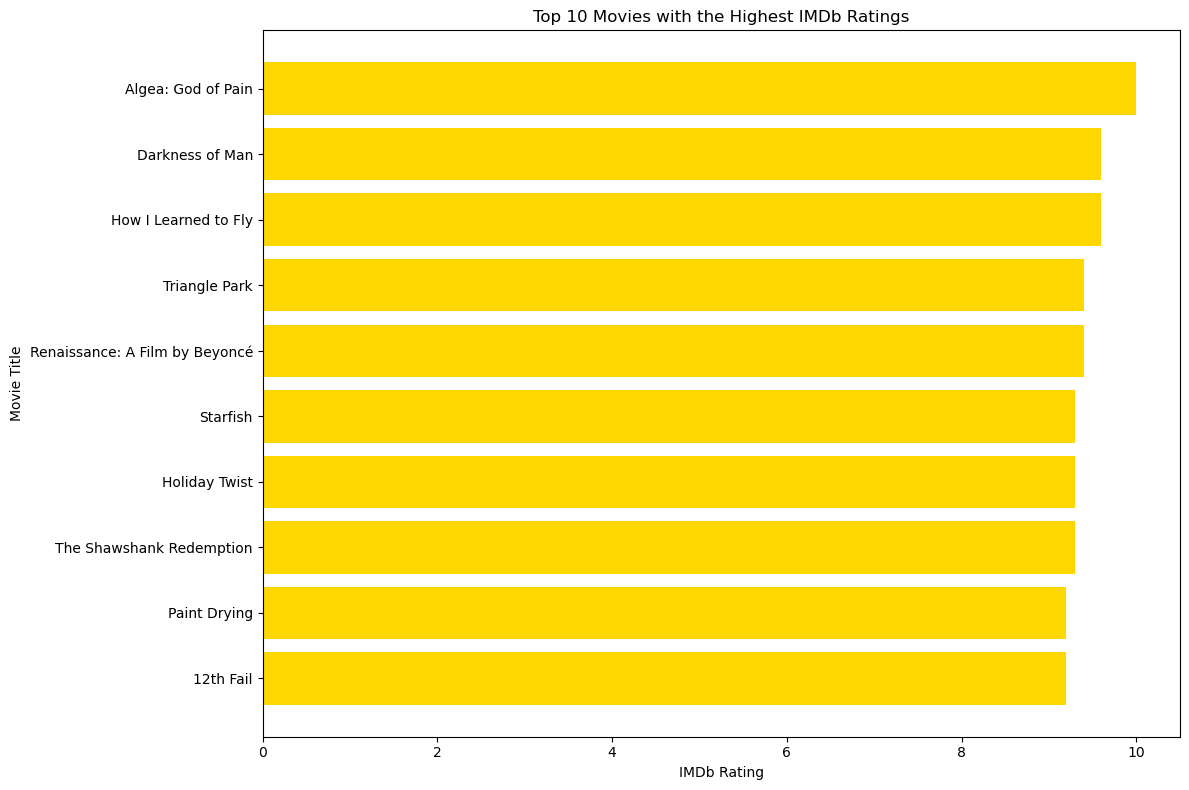

In [39]:
top_rated_movies = df.sort_values(by='Rating', ascending=False).head(10)
# Visualization
plt.figure(figsize=(12, 8))
plt.barh(top_rated_movies['Title'], top_rated_movies['Rating'], color='gold')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Highest IMDb Ratings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 2) Which movies were directed by Ridley Scott?


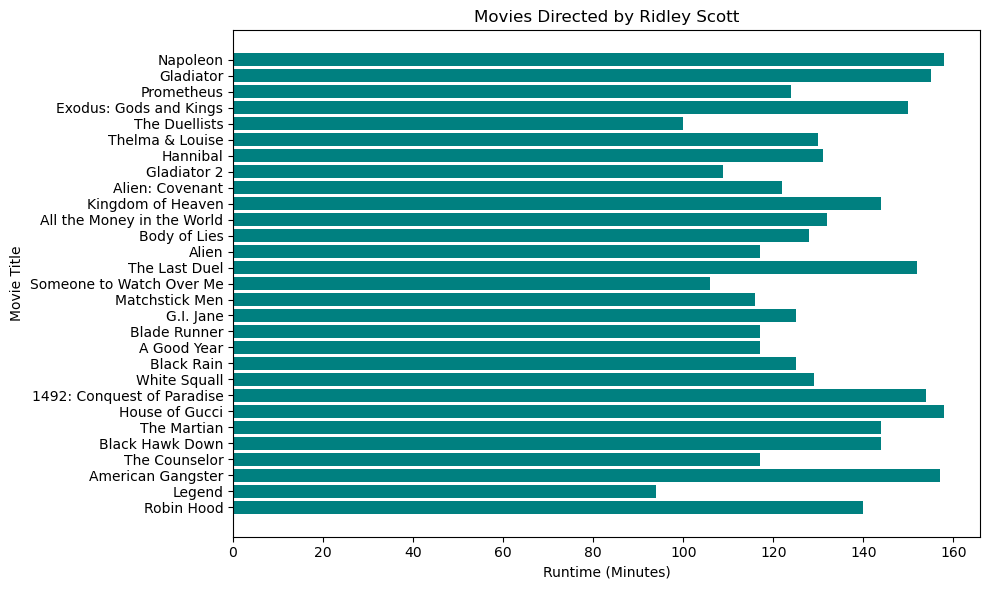

In [40]:
ridley_scott_movies = df[df['Director'] == 'Ridley Scott'].dropna(subset=['Title', 'Runtime_Minutes'])
plt.figure(figsize=(10, 6))
plt.barh(ridley_scott_movies['Title'], ridley_scott_movies['Runtime_Minutes'], color='teal')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movie Title')
plt.title('Movies Directed by Ridley Scott')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 3) Which genres are most common among the movies listed?


Main_Genres
Drama                   430
Comedy,Drama,Romance    333
Drama,Romance           312
Comedy                  271
Comedy,Drama            251
Name: count, dtype: Int64


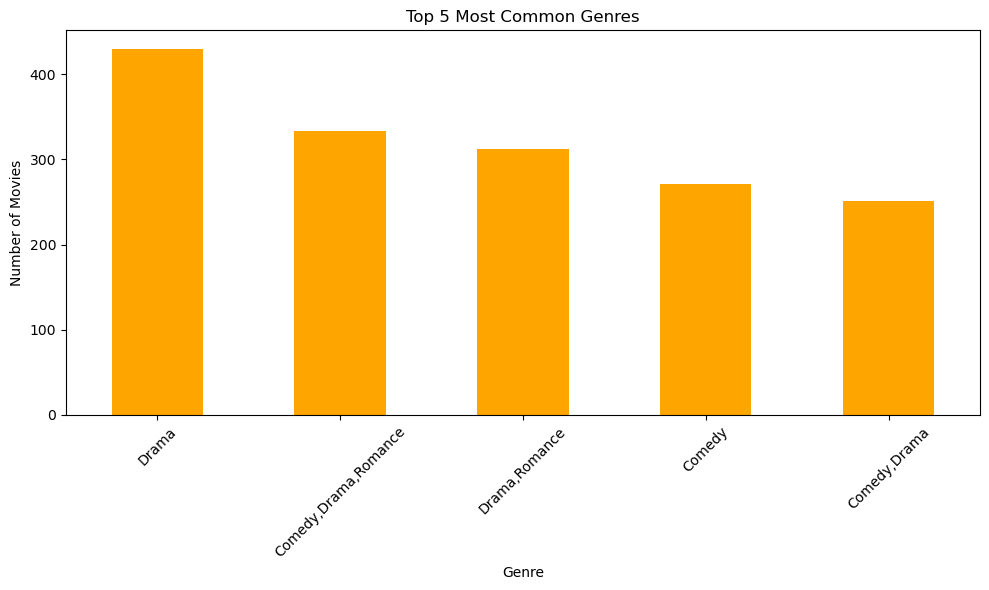

In [41]:
common_genres = df['Main_Genres'].value_counts().head(5)
print(common_genres)
plt.figure(figsize=(10, 6))
common_genres.plot(kind='bar', color='orange')
plt.title('Top 5 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4) How many movies have a Motion Picture Rating of "R"?


In [42]:
# Number of movies with a Motion Picture Rating of "R"
num_r_rated = (df['Motion_Picture_Rating'] == 'R').sum()
print(f"\nNumber of movies with a Motion Picture Rating of 'R': {num_r_rated}")


Number of movies with a Motion Picture Rating of 'R': 4301


## 5) What is the average runtime of movies released after 2020?


108.67359477620529


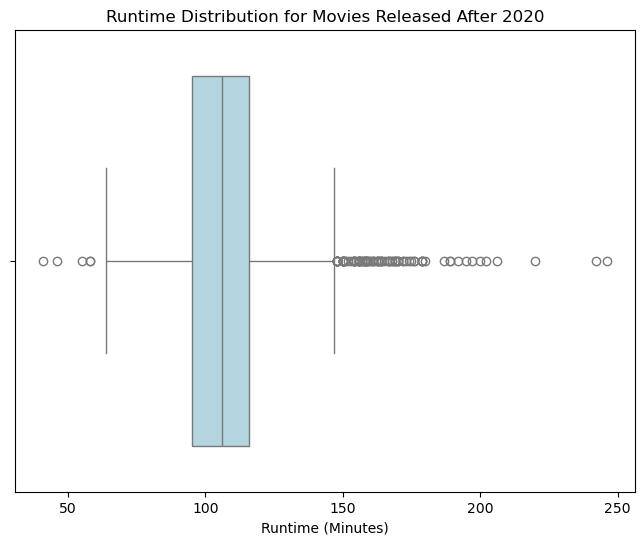

In [43]:
movies_after_2020 = df[df['Release_Year'] > 2020]
average_runtime = movies_after_2020['Runtime_Minutes'].mean()
print(average_runtime)

# Create the boxplot for runtimes
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_after_2020['Runtime_Minutes'], color='lightblue')
plt.title('Runtime Distribution for Movies Released After 2020')
plt.xlabel('Runtime (Minutes)')
plt.show()


## 6) Which movies have grossed over $100 million worldwide?

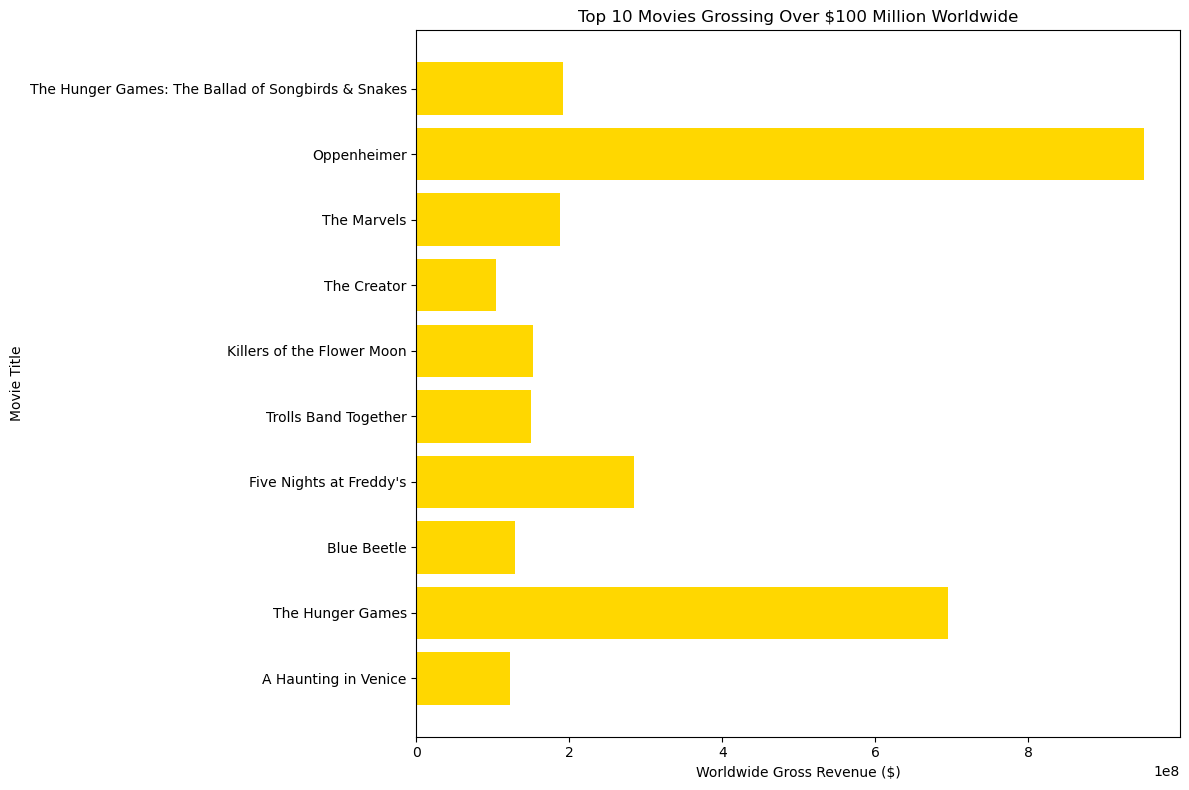

In [44]:
high_grossing_movies = df[df['Gross_worldwide_Num'] > 100_000_000].head(10)
plt.figure(figsize=(12, 8))
plt.barh(high_grossing_movies['Title'], high_grossing_movies['Gross_worldwide_Num'], color='gold')
plt.xlabel('Worldwide Gross Revenue ($)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Grossing Over $100 Million Worldwide')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 7) Who are the top 5 most frequent directors in this dataset?


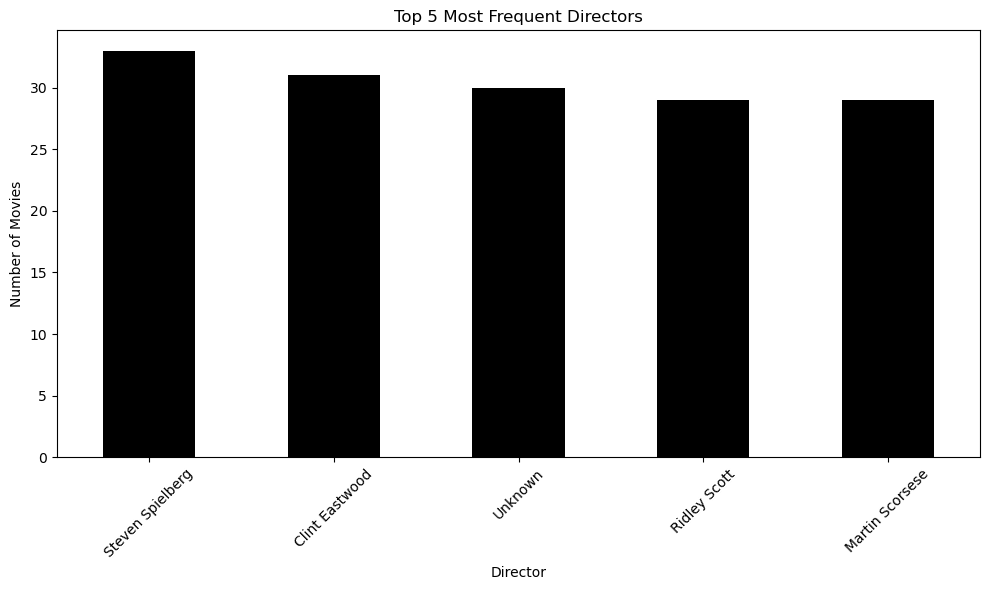

In [45]:
top_directors = df['Director'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='black')
plt.title('Top 5 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8) What is the average number of ratings per movie?

In [46]:
average_ratings = df['Number_of_Ratings_Num'].mean()
print(average_ratings)

98122.98446452181


### 9) Which movies have a runtime longer than 4 hours?

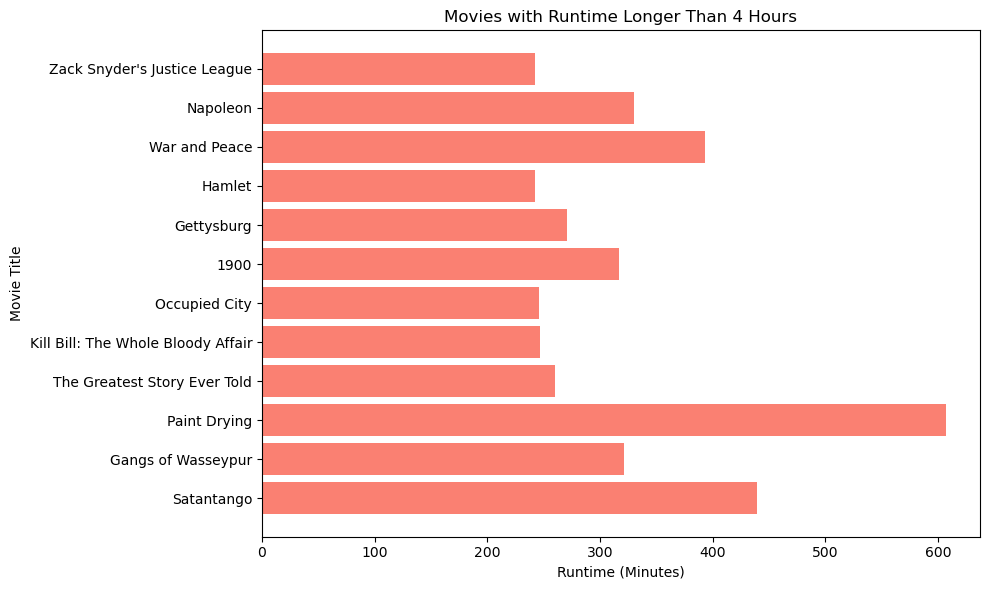

In [47]:
long_runtime_movies = df[df['Runtime_Minutes'] > 240]
plt.figure(figsize=(10, 6))
plt.barh(long_runtime_movies['Title'], long_runtime_movies['Runtime_Minutes'], color='salmon')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movie Title')
plt.title('Movies with Runtime Longer Than 4 Hours')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 10) What is the highest-grossing movie in the US & Canada?

In [48]:
highest_grossing_movie = df.loc[df['Gross_in_US_&_Canada_Num'].idxmax()]
print(highest_grossing_movie[['Title', 'Gross_in_US_&_Canada_Num']])


Title                       Star Wars: Episode VII - The Force Awakens
Gross_in_US_&_Canada_Num                                   936662225.0
Name: 118, dtype: object


### 11) Which PG-13 rated movies have the highest IMDb ratings?

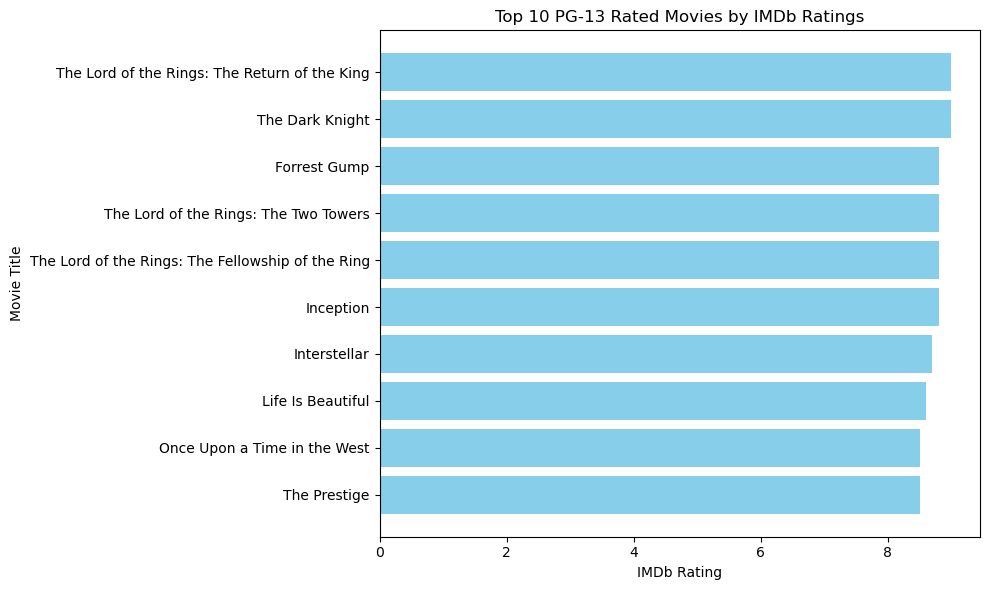

In [49]:

pg13_highest_rated = df[df['Motion_Picture_Rating'] == 'PG-13'].sort_values(by='Rating', ascending=False)
top_pg13_movies = pg13_highest_rated.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_pg13_movies['Title'], top_pg13_movies['Rating'], color='skyblue')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 PG-13 Rated Movies by IMDb Ratings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 12)What are the most common release years in the dataset?

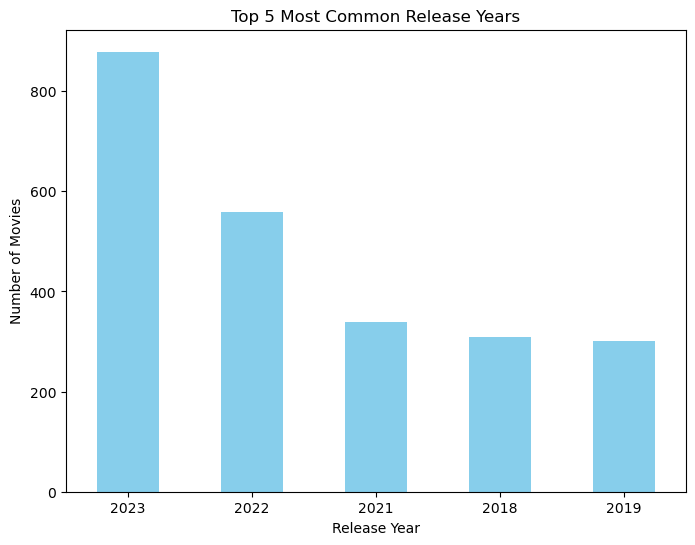

In [50]:
common_release_years = df['Release_Year'].value_counts().head(5)
common_release_years.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Top 5 Most Common Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()


### 13)Which writers have written more than 6 movies here?

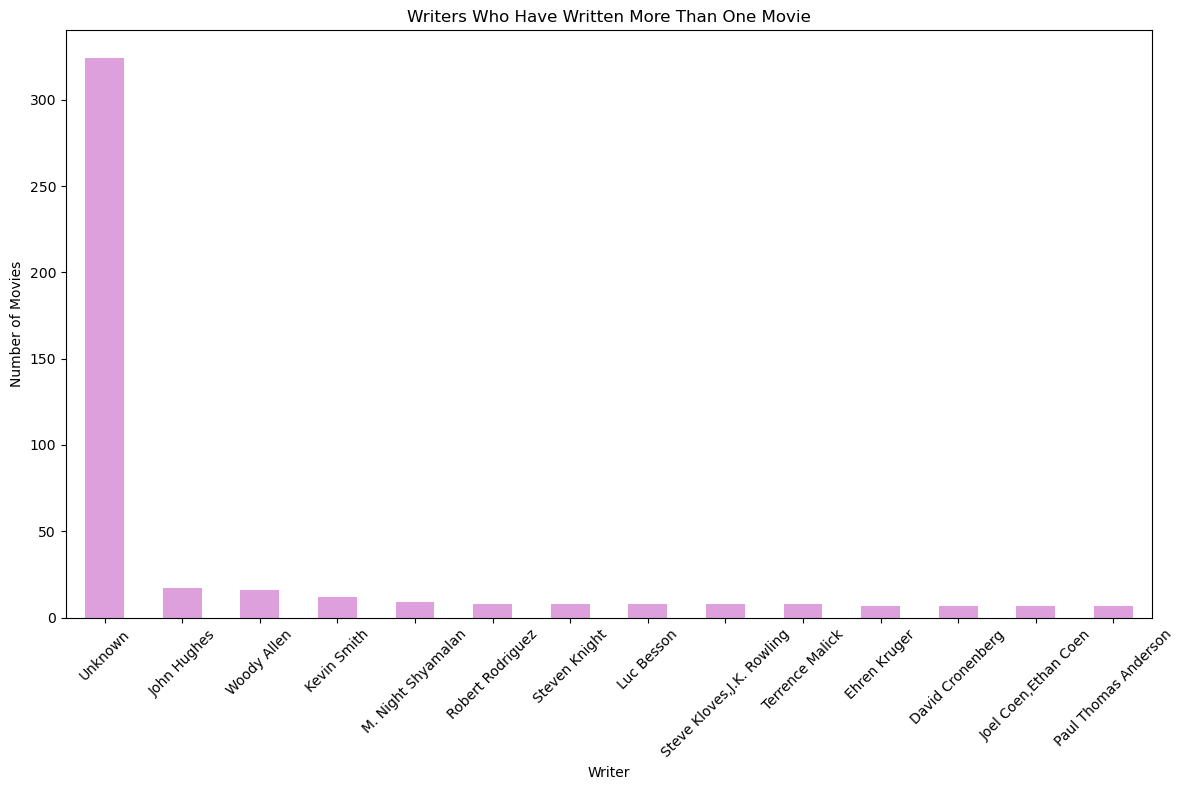

In [51]:
writers_with_multiple_movies = df['Writer'].value_counts()
writers_with_multiple_movies = writers_with_multiple_movies[writers_with_multiple_movies > 6]

# Visualization
plt.figure(figsize=(12, 8))
writers_with_multiple_movies.plot(kind='bar', color='plum')
plt.title('Writers Who Have Written More Than One Movie')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 14) How many movies are categorized as "Horror"?

Number of Horror Movies: 1321


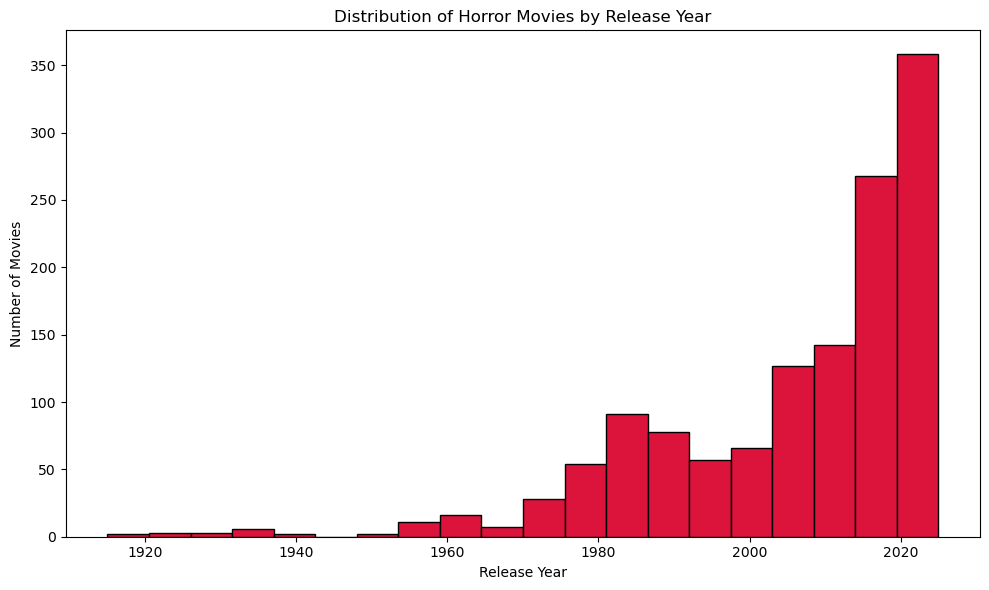

In [52]:
horror_movies_count = df[df['Main_Genres'].str.contains('Horror', na=False)]['Title'].count()
print(f"Number of Horror Movies: {horror_movies_count}")

horror_movies = df[df['Main_Genres'].str.contains('Horror', na=False)]

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(horror_movies['Release_Year'], bins=20, color='crimson', edgecolor='black')
plt.title('Distribution of Horror Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()



### 15)  What is the correlation between rating scores and number of ratings?

                         Rating  Number_of_Ratings_Num
Rating                 1.000000               0.369357
Number_of_Ratings_Num  0.369357               1.000000


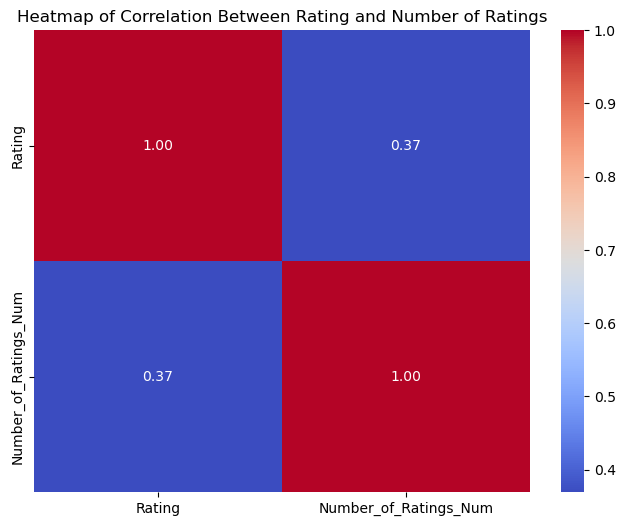

In [55]:
correlation_matrix = df[['Rating', 'Number_of_Ratings_Num']].corr()
print(correlation_matrix)
# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Between Rating and Number of Ratings')
plt.show()


### 16)Which movies had a higher opening weekend gross than total US gross?

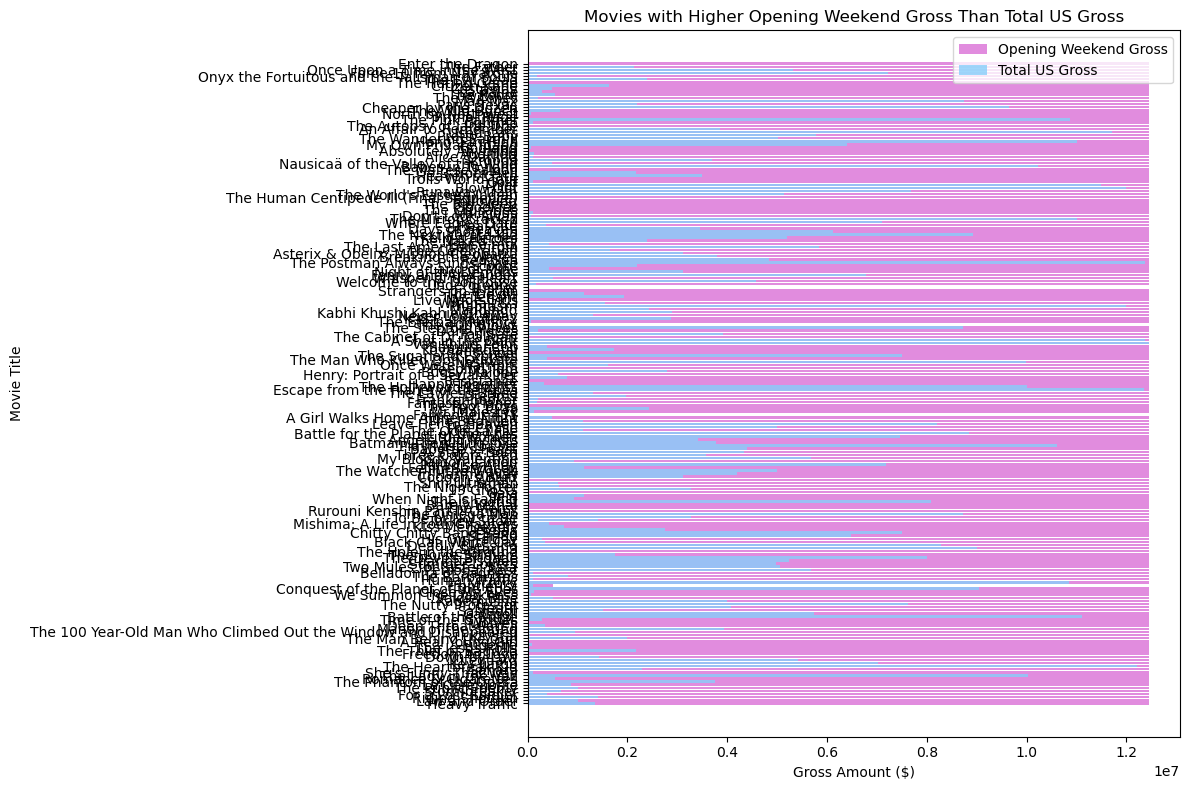

In [35]:
higher_opening_gross_movies = df[df['Opening_Weekend_Gross_Num'] > df['Gross_in_US_&_Canada_Num']]

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(higher_opening_gross_movies['Title'], higher_opening_gross_movies['Opening_Weekend_Gross_Num'], color='orchid', alpha=0.8, label='Opening Weekend Gross')
plt.barh(higher_opening_gross_movies['Title'], higher_opening_gross_movies['Gross_in_US_&_Canada_Num'], color='lightskyblue', alpha=0.8, label='Total US Gross')
plt.xlabel('Gross Amount ($)')
plt.ylabel('Movie Title')
plt.title('Movies with Higher Opening Weekend Gross Than Total US Gross')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

